### The Delay Effect FIR Filter

#### 1. **Implementing the Delay Effect (FIR Filter in Time Domain)**

The equation for the FIR filter representing the delay effect is:

s[t] = e[t] + ae[t - D]

Where:
- e[t] is the input signal at time t,
- s[t] is the output signal at time t,
- a is the attenuation factor (a constant that scales the delayed signal),
- D is the delay in samples.

To implement this, we can use the following algorithm:

- Loop through the input signal e[t].
- For each sample e[t], add it to the delayed version of itself e[t - D], scaled by a.
- If t - D < 0 (for the initial samples where the delayed index is negative), we assume e[t - D] = 0 (i.e., no contribution from the delayed signal).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import freqz

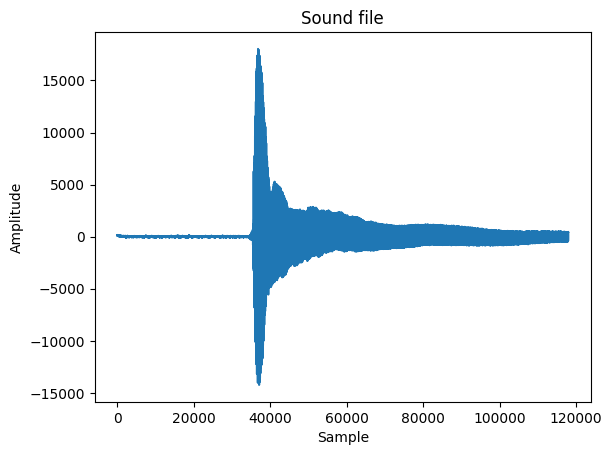

In [2]:
sound_file = 'data/string_2.wav'
fs, e = wavfile.read(sound_file)

# Plot the sound file

plt.figure()
plt.plot(e)
plt.title('Sound file')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

Text(0, 0.5, 'Amplitude')

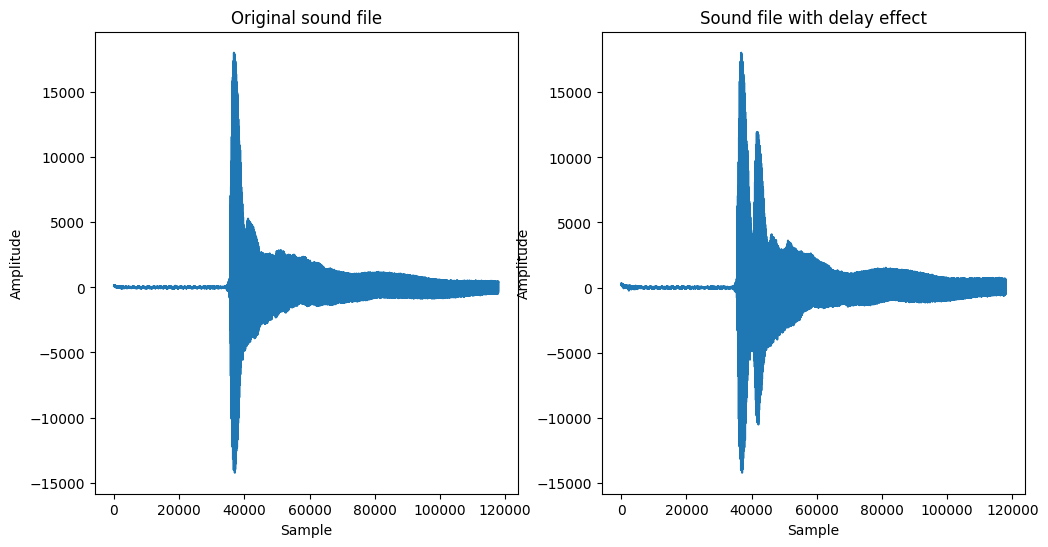

In [3]:
# Parameters for the delay effect
a = 0.5  # Attenuation factor
D = 5000    # Delay in samples

# Create the delayed signal
y = np.zeros_like(e)
y[:D] = e[:D]
y[D:] = a * e[:-D]

# Create the output signal
s = e + y
wavfile.write('data/FIR_sound.wav', fs, s)

# Plot the original and delayed signals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(e)
plt.title('Original sound file')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(s)
plt.title('Sound file with delay effect')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

#### 2. **Impulse Response of the Filter**

To determine the impulse response of the filter:
- The input e[t] is a unit impulse signal, i.e., e[0] = 1 and e[t] = 0 for all $ t \neq 0 $.
- The impulse response h[t] is the output of the filter when the input is an impulse.

For an FIR filter with the equation $s[t] = e[t] + ae[t - D]$, the impulse response $h[t]$ would be:
- $h[t] = 1$ at $t = 0$ (corresponding to the $e[t]$ term).
- $h[t] = a$ at $t = D$ (corresponding to the delayed term $a \cdot e[t - D]$).
- $h[t] = 0$ otherwise.

Thus, the impulse response is a two-point function: $h[0] = 1$ and $h[D] = a$, with zeros elsewhere.


#### 3. **Frequency Response of the Filter**

The frequency response $H(f)$ of a linear time-invariant system is the Fourier Transform of the impulse response $h[t]$. For the filter equation:

$$
h[t] = \delta(t) + a \cdot \delta(t - D)
$$

Where $ \delta(t) $ is the Dirac delta function. The Fourier transform of this impulse response can be computed as:

$$
H(f) = 1 + a \cdot e^{-j2\pi f D}
$$

Where:
- $f$ is the frequency in Hz.
- $j$ is the imaginary unit.

Now let's implement this filter, impulse response, and frequency response numerically using Python.


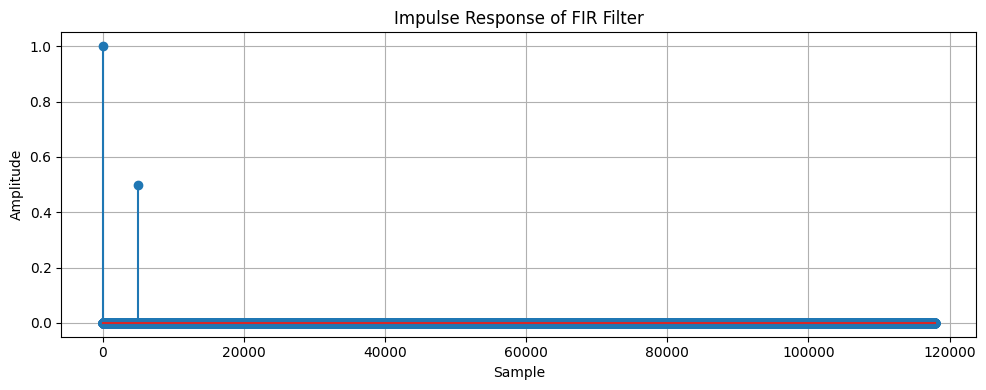

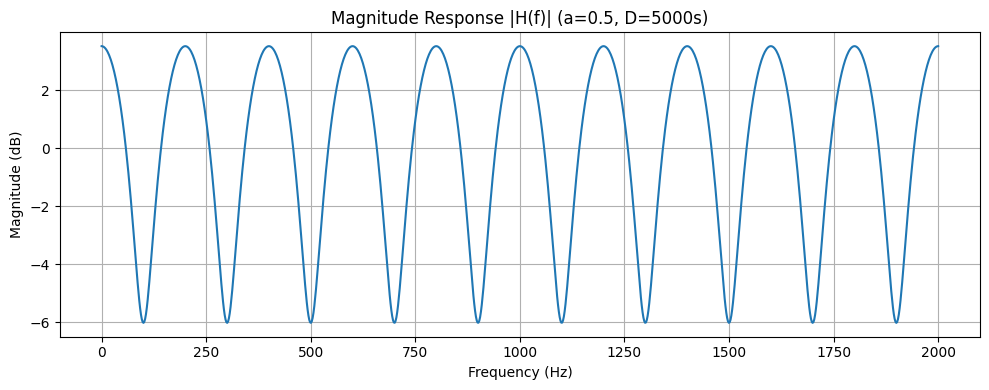

In [4]:
# Impulse response of the FIR filter
impulse_response = np.zeros(e.shape[0])
impulse_response[0] = 1
impulse_response[D] = a

f = np.linspace(0, 2000, 1000)  # Frequency range from 0 to 2 kHz

# Compute frequency response
H = 1 + a * np.exp(-1j * 2 * np.pi * f * D)

# Plot magnitude response
plt.figure(figsize=(10, 4))

plt.grid()
plt.stem(impulse_response)
plt.title("Impulse Response of FIR Filter")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# Plot phase response
plt.figure(figsize=(10, 4))
plt.plot(f, 20 * np.log10(np.abs(H)))
plt.title(f'Magnitude Response |H(f)| (a={a}, D={D}s)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.tight_layout()
plt.show()


The results from the numerical implementation show:

1. **Impulse Response**: The FIR filter has two non-zero values: one at $t = 0$ with amplitude 1 (representing the direct signal) and another at $t = D$ with amplitude $a = 0.5$ (representing the delayed signal). This is consistent with the expected impulse response for a delay effect filter.

2. **Frequency Response (Magnitude)**: The magnitude of the frequency response reveals how different frequencies are attenuated by the filter. As expected for this type of delay filter, there are periodic peaks and dips in the response due to the interference between the direct and delayed signals, showing that some frequencies are amplified while others are attenuated.

The IIR filter for delay effect can be implement thanks to the following input-output equation (e[t] is the input and s[t] is the output):

s[t] = αe[t] + βs[t − D]

Where a>0 is the scaling factor, β>0 is the attenuation factor and D is the time delay
‣ Implement the delay effect in the time domain
‣ Determine the impulse response of the filter (numerically)
‣ Provide the Frequency response of the filter (numerically)
‣ Is this implementation always stable ?
‣ Discuss the parameters
‣ Compare with the FIR implementation

### The Delay Effect IIR 

The equation for the IIR filter representing the delay effect is:

$$
s[t] = a \cdot e[t] + b \cdot s[t - D]
$$

Where:
- e[t] is the input signal,
- s[t] is the output signal,
- a is the scaling fator,
- b is the attenuation factor (a constant that scales the delayed signal),
- D is the delay in samples.

This is a **recursive filter** with feedback, used to simulate echo or delay effects in audio or signal processing.

In [5]:
# Parameters
a = 1.0       # Scaling of input
b = 0.5        # Feedback attenuation
D = 20000           # Delay in sample


# Allocate output signal
s = np.zeros_like(e)

# IIR delay filter loop
for t in range(len(e)):
    input_term = a * e[t]
    feedback_term = b * s[t - D] if t >= D else 0
    s[t] = input_term + feedback_term


Text(0, 0.5, 'Amplitude')

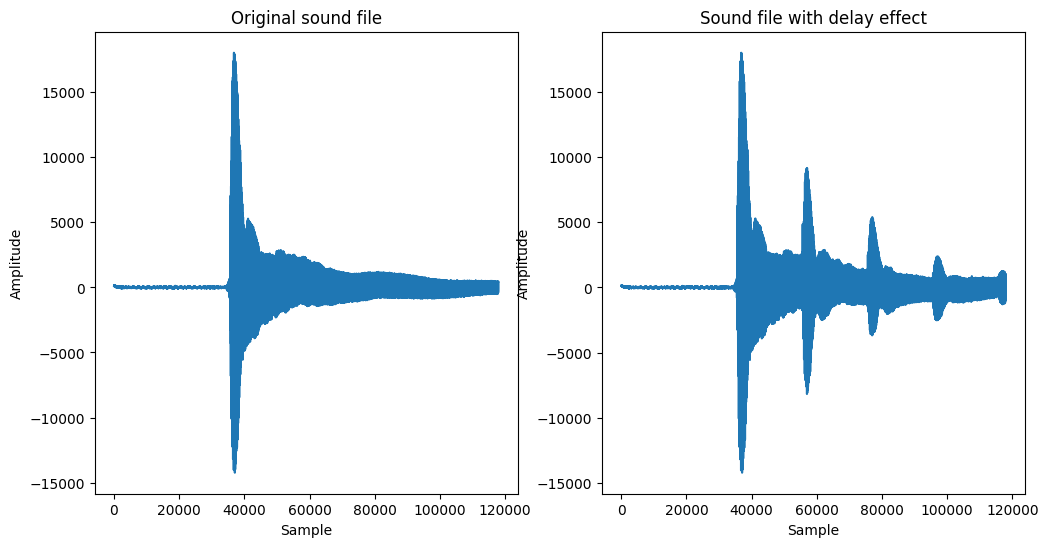

In [6]:
wavfile.write('data/IIR_sound.wav', fs, s)

# Plot the original and delayed signals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(e)
plt.title('Original sound file')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(s)
plt.title('Sound file with delay effect')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

#### ✅ 2. Impulse Response (Numerical)

The impulse response is just the output `s[t]` when the input is an impulse. You can observe:

$$
h[0] = \alpha, \quad h[D] = \alpha\beta, \quad h[2D] = \alpha\beta^2, \quad \dots
$$

So in general:

$$
h[t] = 
\begin{cases}
\alpha \cdot \beta^{t/D}, & \text{if } t \mod D = 0 \\
0, & \text{otherwise}
\end{cases}
$$

---

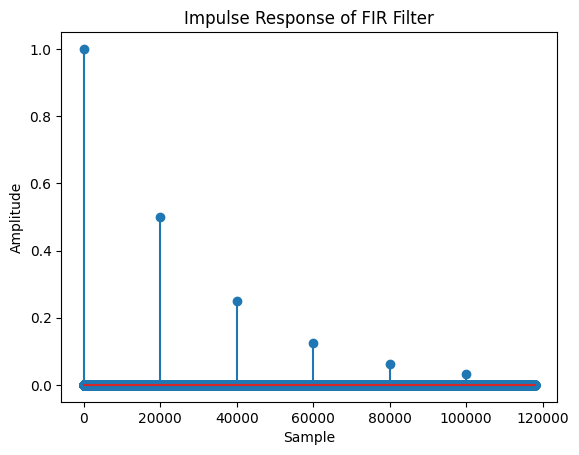

In [7]:
# Impulse response of the FIR filter
impulse_response = np.zeros(e.shape[0])
indices = np.arange(0, e.shape[0], D)
impulse_response[indices] = a * b ** np.arange(len(indices))

plt.stem(impulse_response)
plt.title("Impulse Response of FIR Filter")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()


#### ✅ 3. Frequency Response (Numerical)

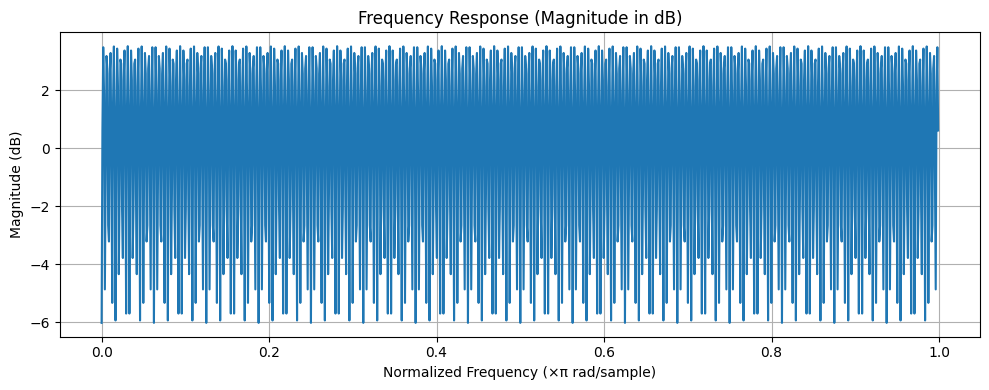

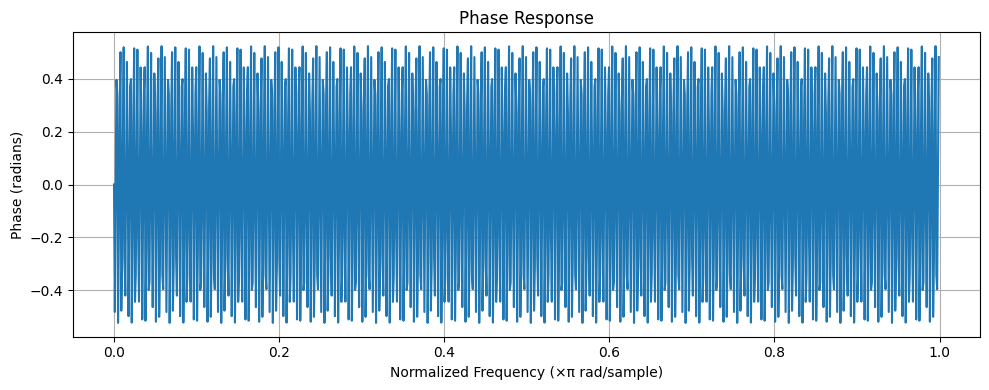

In [8]:
# Compute frequency response from coefficients
ff = [a] + [0]*(D-1) + [0]  # Feedforward (input)
fb = [1] + [0]*(D-1) + [-b]  # Feedback (output)

w, h = freqz(fb, ff, worN=1024)

# Plot magnitude response
plt.figure(figsize=(10, 4))
plt.plot(w / np.pi, 20 * np.log10(np.abs(h)))
plt.title("Frequency Response (Magnitude in dB)")
plt.xlabel("Normalized Frequency (×π rad/sample)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.tight_layout()
plt.show()

# Plot phase response
plt.figure(figsize=(10, 4))
plt.plot(w / np.pi, np.angle(h))
plt.title("Phase Response")
plt.xlabel("Normalized Frequency (×π rad/sample)")
plt.ylabel("Phase (radians)")
plt.grid()
plt.tight_layout()
plt.show()

## ✅ 4. Stability of the Implementation

The system is **stable if and only if** the feedback does not grow unbounded.

**Stability condition:**

$$
|\beta| < 1
$$

If $\beta \geq 1$, the echoes don't decay — instead, they grow, and the system becomes unstable.

---

## ✅ 5. Discussion of Parameters

* **$\alpha$**: Controls the strength of the current input in the output (initial volume of the signal).
* **$\beta$**: Controls the **feedback gain** — higher $\beta$ means longer-lasting echoes.
* **$D$**: The delay in samples — determines **echo timing**. Larger $D$ = longer gap between echoes.

Tradeoffs:

* Low $\beta$ = subtle reverb
* High $\beta$ ≈ ringing or feedback
* Large $D$ = distinct echo; small $D$ = flutter or chorus

---

## ✅ 6. Comparison with FIR Implementation

### FIR Delay Filter:

$$
s[t] = e[t] + a \cdot e[t - D]
$$

* **Finite Impulse Response**: Only two non-zero taps, impulse dies quickly.
* **Always stable**
* No feedback — no resonance or repeated echoes.
* Only one echo (unless more taps added manually).

### IIR Delay Filter:

$$
s[t] = \alpha e[t] + \beta s[t - D]
$$

* **Infinite Impulse Response**: Echoes continue forever (in theory).
* Allows recursive accumulation — **natural for simulating echoes or reverbs**
* Can be unstable if $|\beta| \geq 1$